# Clean and Analyze Employee Exit Surveys

This project focuses on cleaning a dataset.
We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:
* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:
* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

In [131]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

print("INFO:\n")
dete_survey.info()
print("HEAD:\n", dete_survey.head())
print("ISNULL:\n", dete_survey.isnull().sum())

INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        8

For the dete database we can see there are a few columns with mostly null values. These are Classification, Business Unit, Aboriginal, Torres Strait, South Sea, Disability and NESB.
Let's check tafe:

In [132]:
print("INFO:\n")
tafe_survey.info()
print("HEAD:\n", tafe_survey.head())
print("ISNULL:\n", tafe_survey.isnull().sum())

INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                           

Apparently dete survey contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. We will read it again.
Also, we will remove many columns that are not relevant for our analysis.

In [133]:
dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1).copy()
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1).copy()


Next, we will standarize the column names between the two datasets.

In [134]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ', '_').str.strip()
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [135]:
new_names = {'Record ID': 'id',
          'CESSATION YEAR': 'cease_date',
          'Reason for ceasing employment': 'separationtype',
          'Gender. What is your Gender?': 'gender',
          'CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(new_names, axis = 1)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Filter Resignation Rows
Since we are aiming to answer why people are resigning, we will filter the data so we are left only with entries where the seperation type is resignation.

In [136]:
dete_survey_updated['separationtype'].value_counts()
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.split('-').str[0] == 'Resignation'].copy()
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [137]:
tafe_survey_updated['separationtype'].value_counts()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

### Verifying Part of the Data

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.
* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [138]:
dete_resignations['cease_date'].value_counts()
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1).astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [139]:
display("dete_start_date values:", dete_resignations['dete_start_date'].value_counts().sort_index())
display("dete_cease_date values:", dete_resignations['cease_date'].value_counts().sort_index())
display("tafe_cease_date values:", tafe_resignations['cease_date'].value_counts().sort_index())

'dete_start_date values:'

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

'dete_cease_date values:'

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

'tafe_cease_date values:'

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

It seems there is nothing wrong with the start and cease dates.

For comparison purposes, we will create "service" column in dete_resignations just like the one in tafe_resignations.

In [140]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0


### Identifying Dissatisfied Employees

In [141]:
display(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
display(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

def update_vals(value):
    if pd.isnull(value):
        return np.nan
    if value == '-':
        return False
    else:
        return True

tafe_dissatisfaction_factors = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]
tafe_dissatisfaction_factors = tafe_dissatisfaction_factors.applymap(update_vals)
tafe_resignations['dissatisfied'] = tafe_dissatisfaction_factors.any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [142]:
dissatisfied_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
                'physical_work_environment', 'lack_of_recognition',
                'lack_of_job_security', 'work_location',
                'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations[dissatisfied_columns].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
display(tafe_resignations_up.info())
display(dete_resignations_up.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

None

### Combining The Datasets

In [143]:
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined_updated = combined.dropna(axis=1, thresh = 289)
combined_updated.info()
display(combined_updated['institute_service'].value_counts().sort_index())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 43 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   position                                             598 non-null    object 
 4   employment_status                                    597 non-null    object 
 5   career_move_to_public_sector                         311 non-null    object 
 6   career_move_to_private_sector                        311 non-null    object 
 7   interpersonal_conflicts                              311 non-null    object 
 8   job_dissatisfaction                                  311 non-null    o

TypeError: '<' not supported between instances of 'float' and 'str'

Next we will categorize the values in institute_service column using these definitions:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [146]:
combined_updated2 = combined_updated.copy()
display(combined_updated2['institute_service'].value_counts())
combined_updated2['institute_service'] = combined_updated2['institute_service'].astype(str)
combined_updated2['institute_service'] = combined_updated2['institute_service'].str.replace('Less than 1 year', '1')
combined_updated2['institute_service'] = combined_updated2['institute_service'].str.replace('More than 20 years', '20')
combined_updated2 = combined_updated2[combined_updated2['institute_service'] != 'nan']
combined_updated2['institute_service'] = combined_updated2['institute_service'].str.replace('1-2', '1.5')
combined_updated2['institute_service'] = combined_updated2['institute_service'].str.replace('11-20', '15.5')
combined_updated2['institute_service'] = combined_updated2['institute_service'].str.replace('3-4', '3.5')
combined_updated2['institute_service'] = combined_updated2['institute_service'].str.replace('5-6', '5.5')
combined_updated2['institute_service'] = combined_updated2['institute_service'].str.replace('7-10', '8.5')
combined_updated2['institute_service'] = combined_updated2['institute_service'].astype(float)
display(combined_updated2['institute_service'].value_counts().sort_index())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


0.0     20
1.0     95
1.5     64
2.0     14
3.0     20
3.5     63
4.0     16
5.0     23
5.5     33
6.0     17
7.0     13
8.0      8
8.5     21
9.0     14
10.0     6
11.0     4
11.5    26
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0    17
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In [147]:
def service_to_stage(value):
    if value < 3:
        return 'New'
    elif value < 7:
        return 'Experienced'
    elif value < 11:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated2['service_cat'] = combined_updated2['institute_service'].apply(service_to_stage)
combined_updated2['service_cat']

3      Established
5          Veteran
8      Experienced
9          Veteran
11     Experienced
          ...     
693            New
696    Experienced
697            New
699    Experienced
701    Experienced
Name: service_cat, Length: 563, dtype: object

### Initial Analysis

False    349
True     214
Name: dissatisfied, dtype: int64

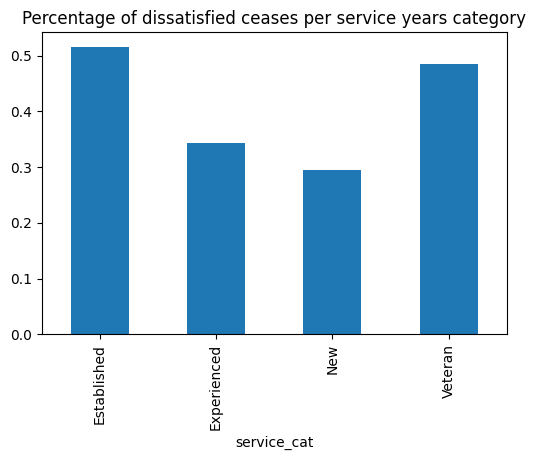

In [157]:
display(combined_updated2['dissatisfied'].value_counts(dropna=False))
combined_updated2['dissatisfied'] = combined_updated2['dissatisfied'].fillna(value=True)
pivot_data = combined_updated2.pivot_table(values='dissatisfied', index='service_cat')
%matplotlib inline
pivot_data.plot(kind='bar', title='Percentage of dissatisfied ceases per service years category', legend=False )

It seems like job dissatisfication affects more the experienced employees who work for 7 years or more.